In [31]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import re
import nltk.corpus
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Reads in the data
train_data = pd.read_csv('train.csv')

# Drops all columns text and target
cols_to_drop = ['id', 'keyword', 'location']
train_data = train_data.drop(cols_to_drop, axis=1)

# Removes punctuation and special characters
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    return df
data_clean = clean_text(train_data, 'text', 'text')
# Removes stop words 
data_clean['text'] = data_clean['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

data_clean.head()

,text,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officers evacuation shelter place orders expected,1
3,people receive wildfires evacuation orders california,1
4,got sent photo ruby alaska smoke wildfires pours school,1


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
print(data_clean.head())
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(data_clean['text'])
features   = vectorizer.get_feature_names_out()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

NameError: name 'data_clean' is not defined

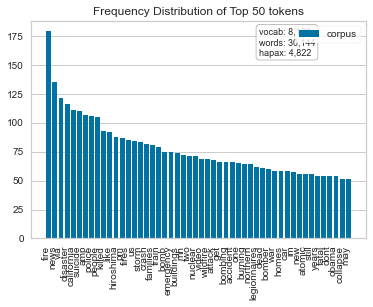

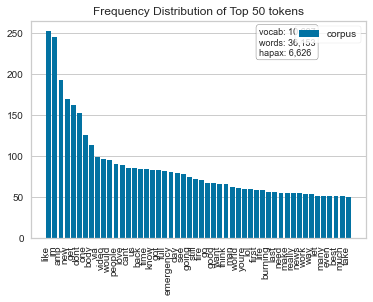

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [43]:
real_data = data_clean[data_clean['target'] == 1]
real_vectorizer = CountVectorizer()
real_docs = real_vectorizer.fit_transform(real_data['text'])
real_features = real_vectorizer.get_feature_names_out()
real_visualizer = FreqDistVisualizer(features=real_features, orient='v')
real_visualizer.fit(real_docs)
real_visualizer.show()

fake_data = data_clean[data_clean['target'] == 0]
fake_vectorizer = CountVectorizer()
fake_docs = fake_vectorizer.fit_transform(fake_data['text'])
fake_features = fake_vectorizer.get_feature_names_out()
fake_visualizer = FreqDistVisualizer(features=fake_features, orient='v')
fake_visualizer.fit(fake_docs)
fake_visualizer.show()

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn

X_train, X_test, y_train, y_test = train_test_split(data_clean['text'],data_clean['target'],random_state = 0)
vectorizer = TfidfVectorizer(min_df=10)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X_train, y_train)

LogisticRegression(C=0.1)

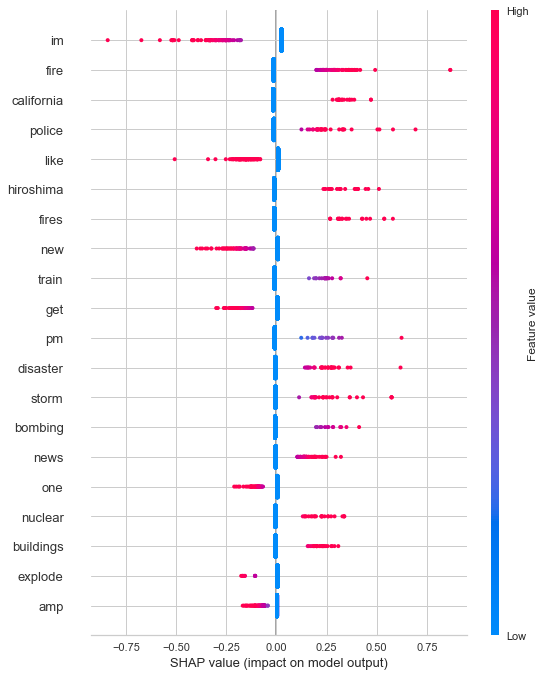

In [64]:
import shap
shap.initjs()
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)
X_test_array = X_test.toarray()
shap.summary_plot(shap_values, X_test_array, feature_names=vectorizer.get_feature_names())

ind = 0
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test_array[ind,:],
    feature_names=vectorizer.get_feature_names()
)

In [85]:
import eli5
eli5.show_weights(model, vec=vectorizer, top=15)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


Weight?,Feature
+1.056,california
+0.985,hiroshima
+0.898,suicide
+0.884,fires
+0.880,fire
+0.831,killed
+0.762,bombing
+0.710,train
+0.706,police
+0.692,wildfire


In [94]:
print(data_clean.iloc[0])
eli5.show_prediction(model, data_clean['text'].iloc[0], vec=vectorizer)

text      deeds reason earthquake may allah forgive us
target                                               1
Name: 0, dtype: object


Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [95]:
print(data_clean.iloc[57])
eli5.show_prediction(model, data_clean['text'].iloc[57], vec=vectorizer)

text      set hearts ablaze every city gift every skyline like kiss upon lips
target                                                                      0
Name: 57, dtype: object


Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
